# Exploratory analysis

Before beginning, we make note of the structure of the dataset as described in the case description: 
First, the provided data is aggregated into groups based on core demographics attributes, namely `age`, `gender`, `state`, `income`, and `education`. Thus each row of the dataset is an aggregate of patients matching a given set of the aforementioned five predictors as well as for a given quarter (the `date` variable). Together these six predictors define a unique entry in the dataset. 

We begin our analysis by loading the required libraries.

In [29]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

Loading the dataset and viewing the first couple of lines: 

In [30]:
df = pd.read_csv('Data/stanford_blueprint_datathon_2019_data.csv')
df.head()
# df['income'].value_counts()

,age,gender,state,income,education,high_speed_internet_users,technology_and_connectivity__online_gamers,technology_and_connectivity__stream_music,technology_and_connectivity__science_&_new_tech_enthusiasts,technology_and_connectivity__owns_apple_products,...,chlamydia,gential_warts,gonorrhea,herpes,hpv,other_std,parasitic,std_screen,syphilis,trich
0,35-44 years old,Female,New Hampshire,"$45,000 - $49,999",Some High School or Less,medium,0.000000,0.000000,0.057143,0.000000,...,NaN,NaN,NaN,NaN,0.6,NaN,NaN,NaN,NaN,NaN
1,35-44 years old,Female,Alaska,"$150,000 - $159,999",Graduate School,medium,0.032609,0.032609,0.586957,0.021739,...,NaN,NaN,NaN,NaN,NaN,0.6,NaN,NaN,NaN,NaN
2,18-24 years old,Female,"Washington, DC","$55,000 - $59,999",High School,medium,0.130769,0.123077,0.107692,0.053846,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6,NaN,NaN
3,18-24 years old,Female,"Washington, DC","$55,000 - $59,999",High School,medium,0.130769,0.123077,0.107692,0.053846,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6,NaN,NaN
4,18-24 years old,Female,"Washington, DC","$55,000 - $59,999",High School,medium,0.130769,0.123077,0.107692,0.053846,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6,NaN,NaN


## Early exploration (i.e. first day of the datathon) 
Exploring various columns and features of the dataset. We thought that almsot certainly `age` and `gender` would be useful predictors and `services_software_and_online_services__online_dating_paid_users` seemed to make a lot of sense in the context of STD rates: 

In [31]:
df.loc[:100,['age','gender','services_software_and_online_services__online_dating_paid_users']]

,age,gender,services_software_and_online_services__online_dating_paid_users
0,35-44 years old,Female,0.000000
1,35-44 years old,Female,0.000000
2,18-24 years old,Female,0.000000
3,18-24 years old,Female,0.000000
4,18-24 years old,Female,0.000000
...,...,...,...
96,25-34 years old,Male,0.004569
97,25-34 years old,Male,0.004569
98,25-34 years old,Male,0.004569
99,25-34 years old,Male,0.004569


What groups had the highest propensity for 'services_software_and_online_services__online_dating_paid_users'? 

In [32]:
df_od = df.sort_values(by=['services_software_and_online_services__online_dating_paid_users'], ascending=False)
df_od.loc[:10,['age','gender','services_software_and_online_services__online_dating_paid_users',]]

,age,gender,services_software_and_online_services__online_dating_paid_users
1129551,55-64 years old,Female,0.807692
1129553,55-64 years old,Female,0.807692
1129549,55-64 years old,Female,0.807692
1129550,55-64 years old,Female,0.807692
1129552,55-64 years old,Female,0.807692
...,...,...,...
6,18-24 years old,Female,0.000000
7,18-24 years old,Female,0.000000
8,18-24 years old,Female,0.000000
9,18-24 years old,Female,0.000000


It looks 55-64 year olds top this chart. What are some of their other characteristics at a glance? 

In [33]:
df_5564 = df_od.loc[df_od['age'] == '55-64 years old']
df_5564.loc[:,['age','gender','services_software_and_online_services__online_dating_paid_users','chlamydia', 'gential_warts', 'gonorrhea', 'herpes', 'hpv', 'other_std', 'parasitic', 'std_screen', 'syphilis', 'trich']]

,age,gender,services_software_and_online_services__online_dating_paid_users,chlamydia,gential_warts,gonorrhea,herpes,hpv,other_std,parasitic,std_screen,syphilis,trich
1129551,55-64 years old,Female,0.807692,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6,NaN,NaN
1129553,55-64 years old,Female,0.807692,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6,NaN,NaN
1129549,55-64 years old,Female,0.807692,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6,NaN,NaN
1129550,55-64 years old,Female,0.807692,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6,NaN,NaN
1129552,55-64 years old,Female,0.807692,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252511,55-64 years old,Male,0.000000,NaN,NaN,NaN,0.6,NaN,NaN,NaN,NaN,NaN,NaN
567897,55-64 years old,Female,0.000000,NaN,NaN,NaN,0.6,NaN,NaN,NaN,NaN,NaN,NaN
567898,55-64 years old,Female,0.000000,NaN,0.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
567899,55-64 years old,Female,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.8,NaN,NaN


Another angle we can attack from is sorting directly by STD rates, e.g. for gonorrhea: 

In [34]:
df_gn = df.sort_values(by=['gonorrhea'], ascending=False)
df_gn.loc[:10,['age','gender','state','income','education','gonorrhea','date']]

,age,gender,state,income,education,gonorrhea,date
72064,75+ years old,Female,New Jersey,"$125,000 - $129,999",High School,4.4,2016-10-01
565410,55-64 years old,Female,Oklahoma,"$180,000 - $189,999",Graduate School,4.0,2016-01-01
1220703,65-74 years old,Female,Wyoming,"$55,000 - $59,999",High School,3.6,2016-07-01
855997,35-44 years old,Male,Missouri,"$120,000 - $124,999",High School,3.6,2016-07-01
423854,25-34 years old,Female,New York,"$115,000 - $119,999",Graduate School,3.2,2015-07-01
...,...,...,...,...,...,...,...
80,25-34 years old,Female,Nebraska,"$40,000 - $44,999",Some High School or Less,0.6,2017-07-01
28,75+ years old,Female,Mississippi,"$135,000 - $139,999",Graduate School,0.6,2018-04-01
27,75+ years old,Female,Mississippi,"$135,000 - $139,999",Graduate School,0.6,2017-04-01
26,75+ years old,Female,Mississippi,"$135,000 - $139,999",Graduate School,0.6,2016-04-01


Nothing sticks out yet. What if we consider a particular subgroup such as 18-24 year old females?

In [35]:
df_1824f = df.loc[df['age'] == '18-24 years old']
df_1824f = df_1824f.loc[df['gender'] == 'Female']
df_1824f.loc[:,['age','gender','date','chlamydia', 'gential_warts', 'gonorrhea', 'herpes', 'hpv', 'other_std', 'parasitic', 'std_screen', 'syphilis', 'trich']]

,age,gender,date,chlamydia,gential_warts,gonorrhea,herpes,hpv,other_std,parasitic,std_screen,syphilis,trich
2,18-24 years old,Female,2014-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6,NaN,NaN
3,18-24 years old,Female,2015-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6,NaN,NaN
4,18-24 years old,Female,2017-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6,NaN,NaN
5,18-24 years old,Female,2017-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6,NaN,NaN
6,18-24 years old,Female,2017-10-01,NaN,NaN,NaN,NaN,NaN,0.6,NaN,0.6,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1366491,18-24 years old,Female,2017-10-01,NaN,NaN,NaN,NaN,NaN,0.6,NaN,NaN,NaN,0.6
1366492,18-24 years old,Female,2014-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6,0.6
1366493,18-24 years old,Female,2015-10-01,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN
1366494,18-24 years old,Female,2016-01-01,NaN,NaN,NaN,NaN,NaN,0.6,NaN,0.8,NaN,NaN


Is there a great deal of variance with respect to education?

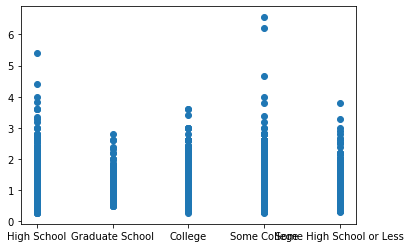

In [36]:
x = df_1824f['education']
y = df_1824f['std_screen']
#z = df_1824f['syphilis']
plt.scatter(x,y)

At this point, one of our team members had remembered reading an article that mentioned the surprising result that actually STD rates are quite high in the elderly population (specifically in nursing homes). For this reason, we decided to start exploring this age group: 

In [38]:
#ages = ['65 - 74 years old', '75+ years old']
dfCAold = df.loc[df['age'] == '65-74 years old']
dfCAold2 = df.loc[df['age'] == '75+ years old']
dfCAold = dfCAold.append(dfCAold2)
dfCAold = dfCAold.loc[dfCAold['state'] == 'California']
#dfCAold.to_csv('oldpplCA.csv')

In [39]:
dfCAold = pd.read_csv('Data/elderly-ppl-CA.csv')
search = []
for values in dfCAold['income']:
    items = re.findall(r'\$(\w+)\,', values)
    search.append(int(items[0]))
dfCAold['incomenum'] = search # create new column with values in search
dfCAold = dfCAold.sort_values(by='incomenum')
dfCAold
#dfTX[['age','income','incomenum']]

,Unnamed: 0,age,gender,state,income,education,high_speed_internet_users,technology_and_connectivity__online_gamers,technology_and_connectivity__stream_music,technology_and_connectivity__science_&_new_tech_enthusiasts,...,gential_warts,gonorrhea,herpes,hpv,other_std,parasitic,std_screen,syphilis,trich,incomenum
8535,342655,75+ years old,Male,California,"Less than $14,999",High School,low,0.039092,0.031186,0.090619,...,NaN,NaN,0.294118,0.088235,0.117647,0.088235,1.029412,0.088235,NaN,14
9891,579904,75+ years old,Female,California,"Less than $14,999",Graduate School,low,0.047352,0.028956,0.124476,...,NaN,NaN,NaN,NaN,NaN,NaN,0.600000,0.600000,NaN,14
9890,579903,75+ years old,Female,California,"Less than $14,999",Graduate School,low,0.047352,0.028956,0.124476,...,NaN,NaN,0.600000,NaN,NaN,NaN,0.600000,NaN,NaN,14
9889,579902,75+ years old,Female,California,"Less than $14,999",Graduate School,low,0.047352,0.028956,0.124476,...,NaN,NaN,0.600000,0.600000,NaN,NaN,0.600000,NaN,NaN,14
9888,579901,75+ years old,Female,California,"Less than $14,999",Graduate School,low,0.047352,0.028956,0.124476,...,NaN,NaN,0.600000,NaN,NaN,NaN,0.600000,1.200000,NaN,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,128350,65-74 years old,Female,California,"$250,000 or more",Some College,medium,0.055292,0.046167,0.097113,...,0.045455,NaN,0.303030,0.121212,0.151515,0.045455,0.666667,0.045455,NaN,250
562,128351,65-74 years old,Female,California,"$250,000 or more",Some College,medium,0.055292,0.046167,0.097113,...,0.136364,NaN,0.227273,0.181818,0.136364,NaN,0.590909,0.181818,NaN,250
563,128352,65-74 years old,Female,California,"$250,000 or more",Some College,medium,0.055292,0.046167,0.097113,...,0.073171,NaN,0.268293,0.073171,0.097561,NaN,0.658537,0.341463,0.073171,250
12687,1189237,75+ years old,Male,California,"$250,000 or more",High School,medium,0.069157,0.054415,0.218745,...,NaN,NaN,NaN,NaN,NaN,NaN,0.600000,NaN,NaN,250


## More refined analysis (plots used in our final presentation) 
Perhaps the clearest way to visualize the effect of income distribution is via a violin plot as follows: 

<Figure size 432x288 with 0 Axes>

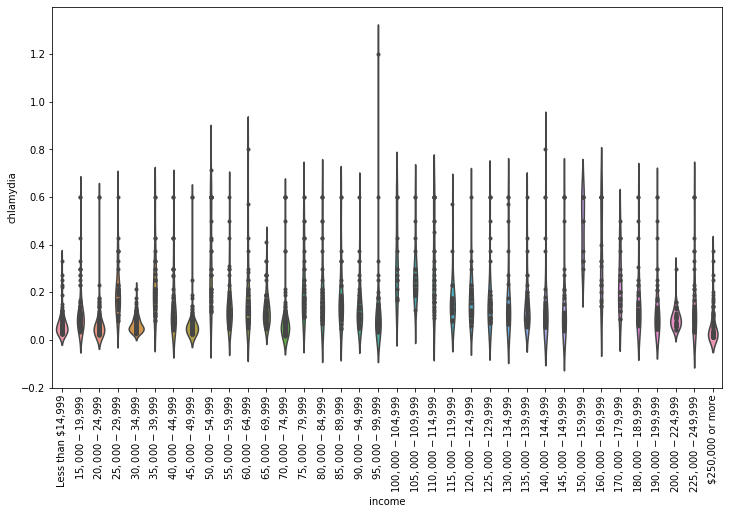

<Figure size 432x288 with 0 Axes>

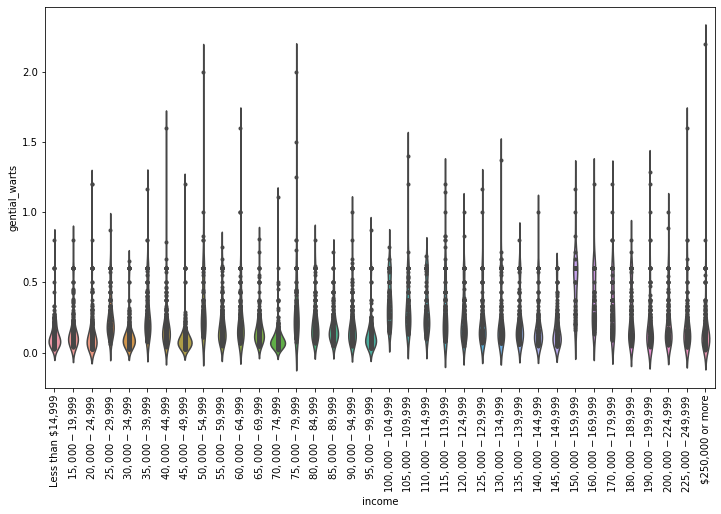

<Figure size 432x288 with 0 Axes>

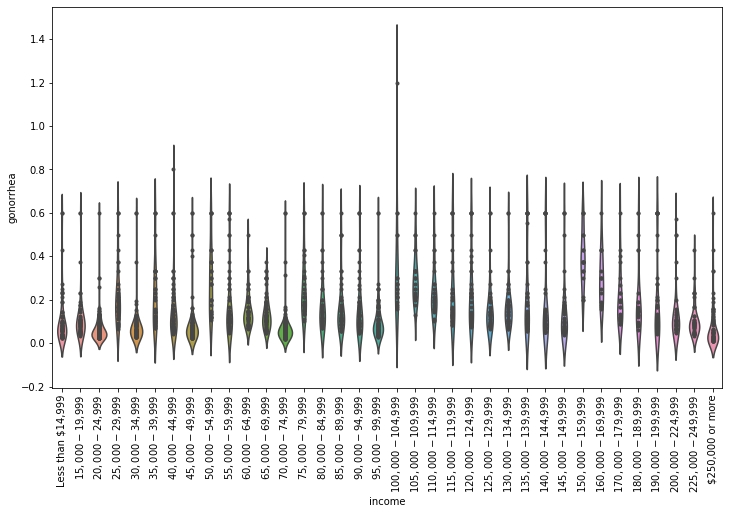

<Figure size 432x288 with 0 Axes>

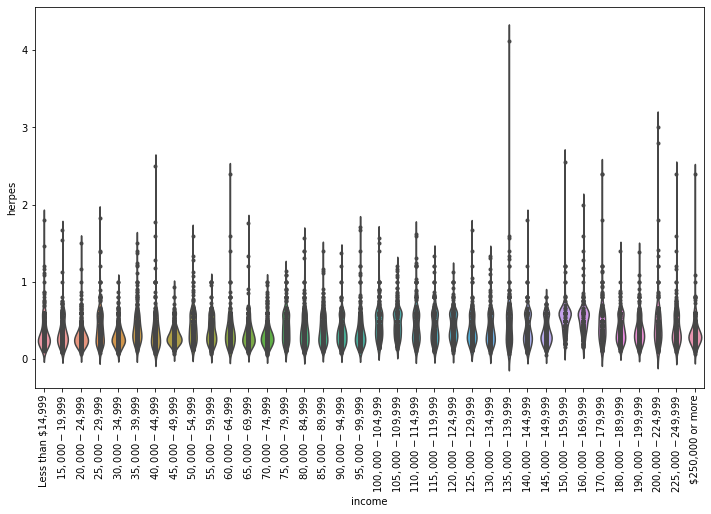

<Figure size 432x288 with 0 Axes>

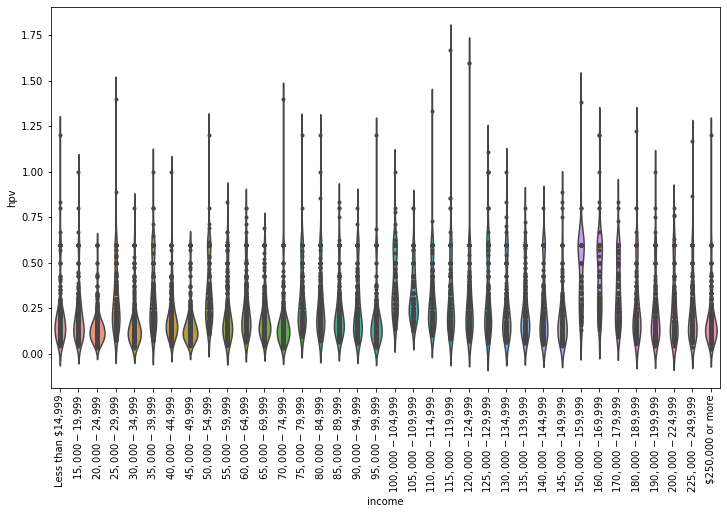

<Figure size 432x288 with 0 Axes>

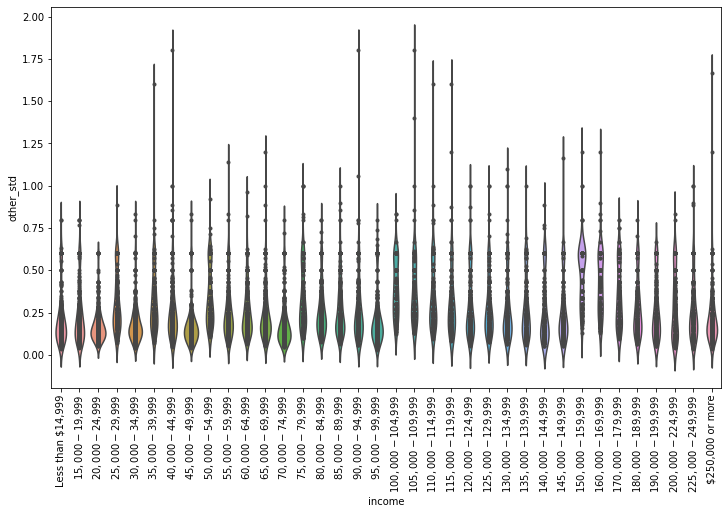

<Figure size 432x288 with 0 Axes>

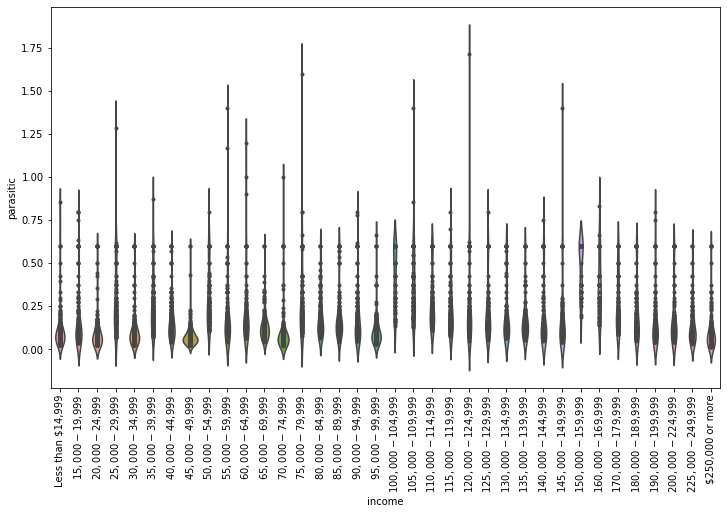

<Figure size 432x288 with 0 Axes>

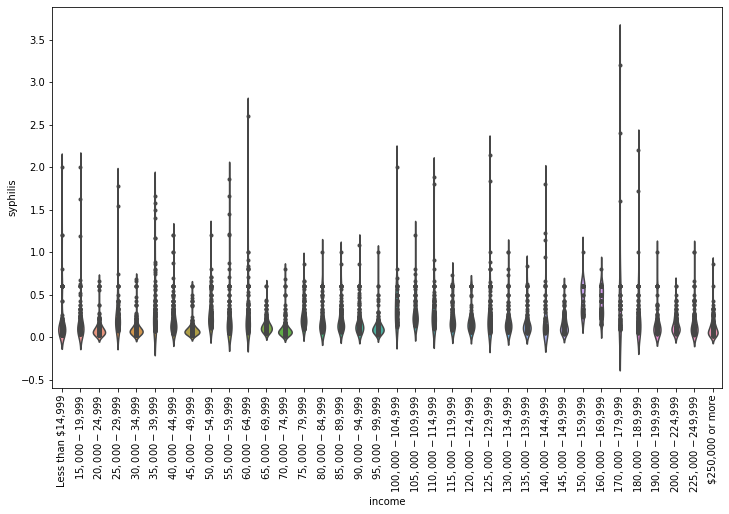

<Figure size 432x288 with 0 Axes>

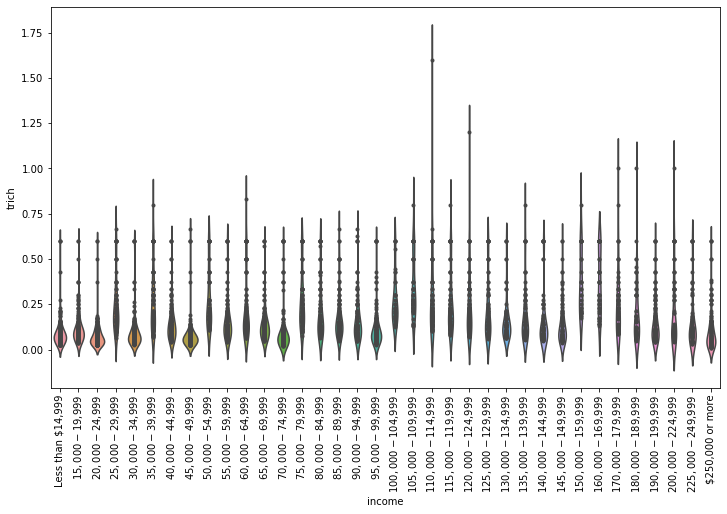

In [57]:
std_list=['chlamydia','gential_warts','gonorrhea','herpes','hpv',
          'other_std','parasitic','syphilis','trich']

for i in std_list:
    plt.figure()
    figure(figsize=(12, 7), facecolor='w')
    sns.violinplot(dfCAold['income'], dfCAold[i], inner = "point")
    plt.xticks(rotation='vertical')
    filename = i + '.pdf'
    plt.savefig('Figures/' + filename, bbox_inches='tight')


From these figures we concluded that there is no particular income distribution that is especially at risk. 

In [41]:
educorder = {'Some High School or Less':1, 'High School':2, 'Some College':3, 'College':4, 'Graduate School':5}
dfCAold_educsort = dfCAold.copy(deep = True)
#dfCAold_educsort
dfCAold_educsort['education'].replace(educorder, inplace = True)
dfCAold_educsort = dfCAold_educsort.sort_values(by = 'education', ascending = True)

<Figure size 432x288 with 0 Axes>

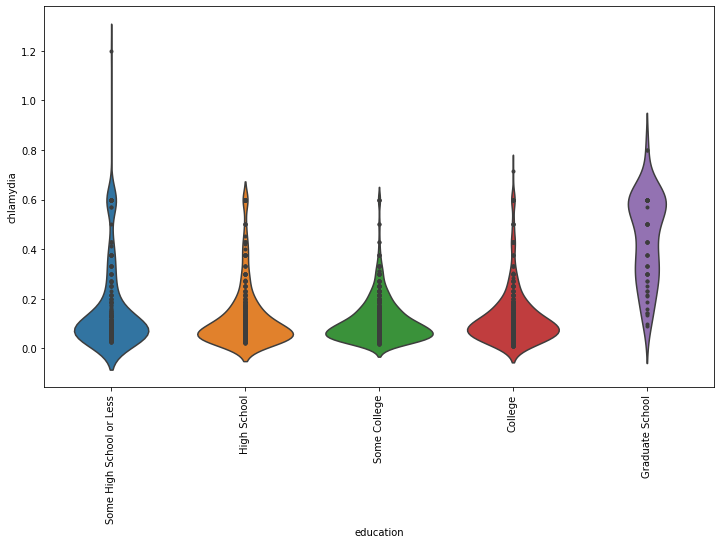

<Figure size 432x288 with 0 Axes>

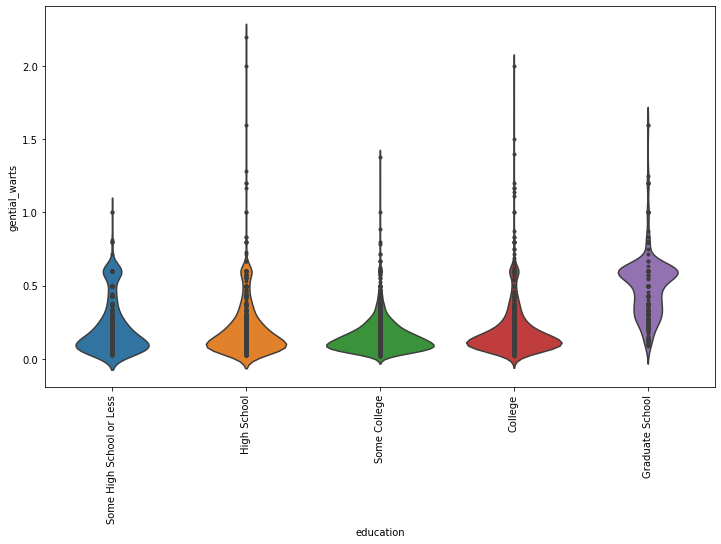

<Figure size 432x288 with 0 Axes>

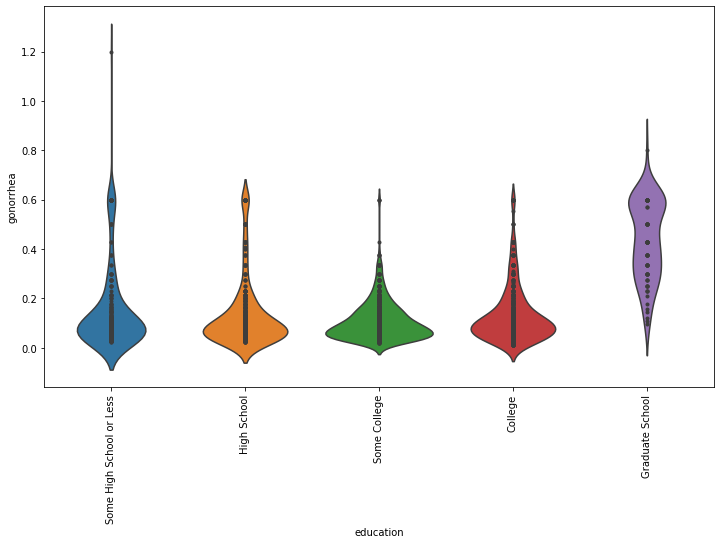

<Figure size 432x288 with 0 Axes>

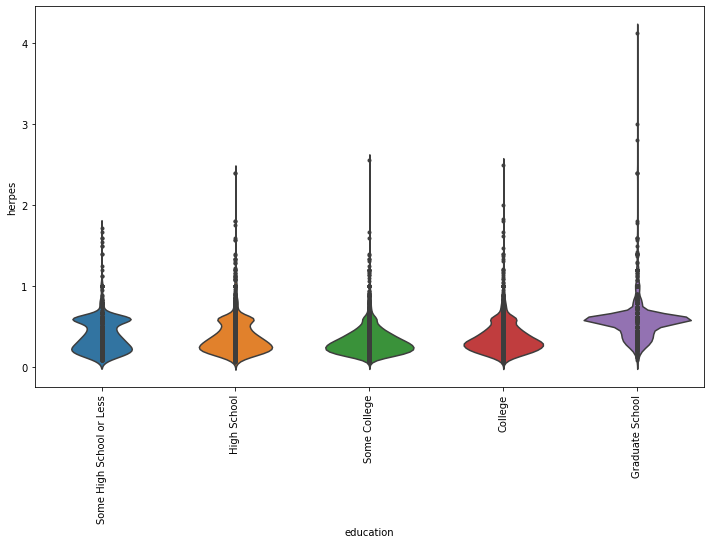

<Figure size 432x288 with 0 Axes>

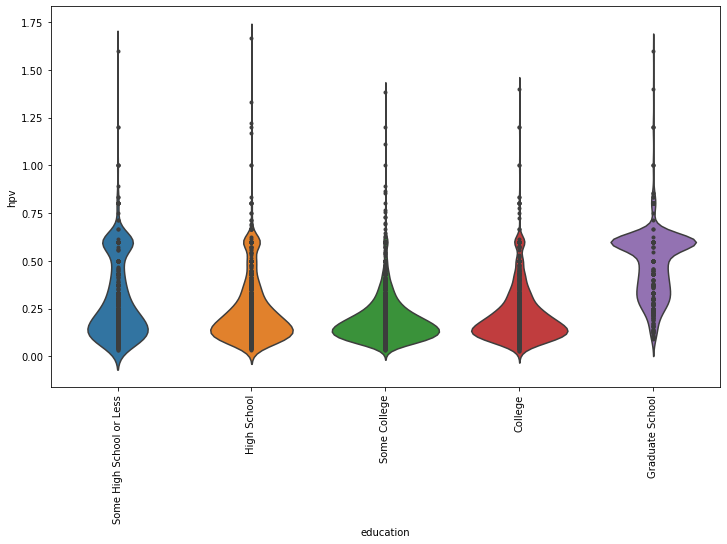

<Figure size 432x288 with 0 Axes>

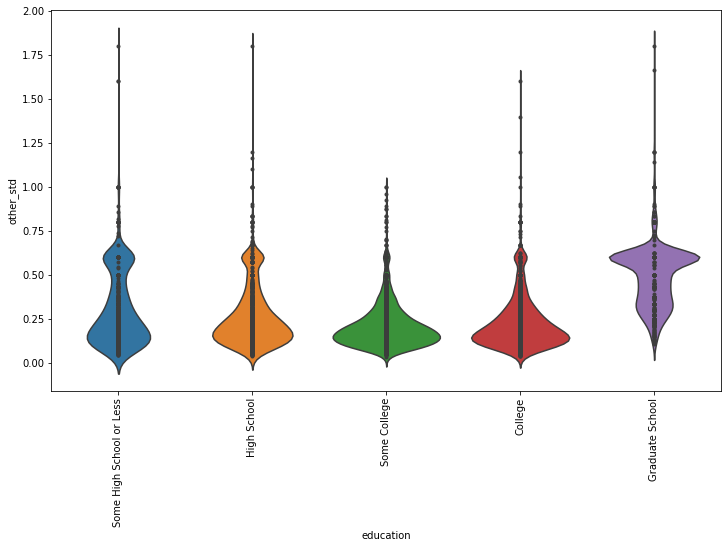

<Figure size 432x288 with 0 Axes>

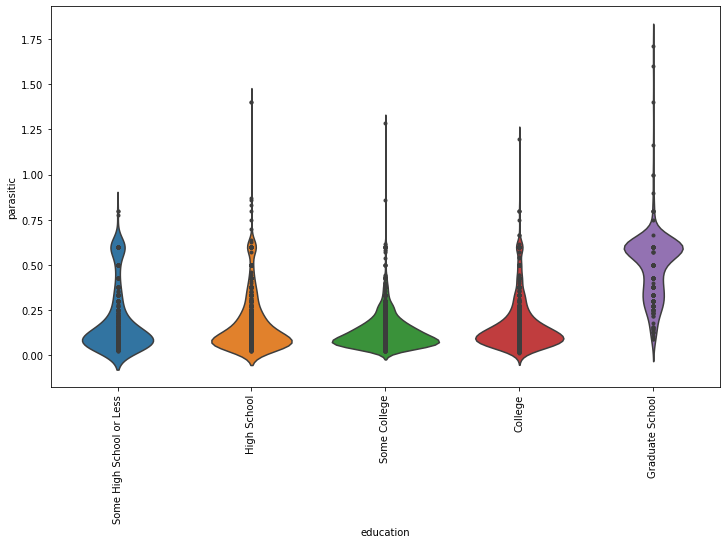

<Figure size 432x288 with 0 Axes>

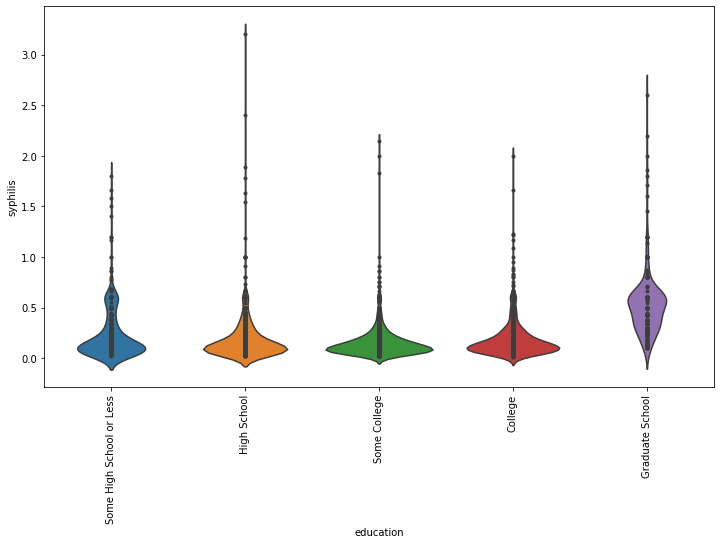

<Figure size 432x288 with 0 Axes>

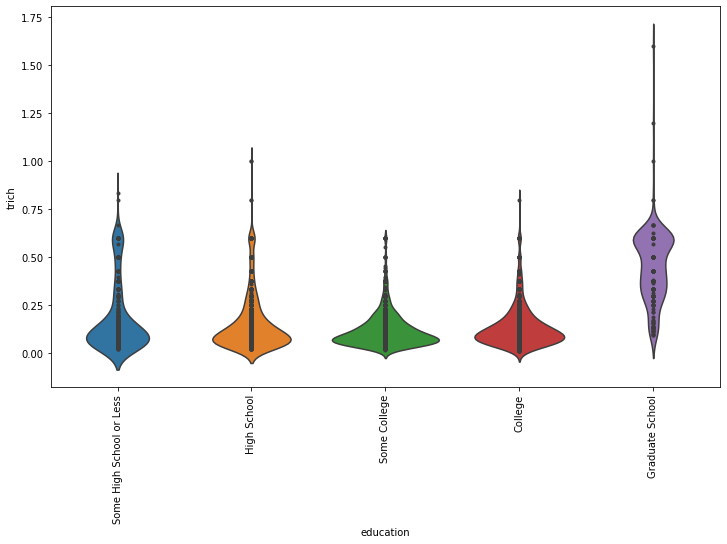

In [42]:
xaxis = 'education'
axislabels = ['Some High School or Less', 'High School', 'Some College', 'College', 'Graduate School']
for i in std_list:
    plt.figure()
    figure(figsize=(12, 7), facecolor='w')
    sns.violinplot(dfCAold_educsort[xaxis], dfCAold_educsort[i], inner = "point", )
    plt.xticks(rotation='vertical')
    plt.xticks([0,1,2,3,4], axislabels)
    #ax = dfCAold.set_index("education").loc[educorder]
    #filename = i + '_' + xaxis + '.pdf'
    #plt.savefig(filename, bbox_inches='tight')

In [43]:
dfCAold.loc[dfCAold['education'] == "Graduate School"]

,Unnamed: 0,age,gender,state,income,education,high_speed_internet_users,technology_and_connectivity__online_gamers,technology_and_connectivity__stream_music,technology_and_connectivity__science_&_new_tech_enthusiasts,...,gential_warts,gonorrhea,herpes,hpv,other_std,parasitic,std_screen,syphilis,trich,incomenum
9891,579904,75+ years old,Female,California,"Less than $14,999",Graduate School,low,0.047352,0.028956,0.124476,...,NaN,NaN,NaN,NaN,NaN,NaN,0.600000,0.600000,NaN,14
9890,579903,75+ years old,Female,California,"Less than $14,999",Graduate School,low,0.047352,0.028956,0.124476,...,NaN,NaN,0.60,NaN,NaN,NaN,0.600000,NaN,NaN,14
9889,579902,75+ years old,Female,California,"Less than $14,999",Graduate School,low,0.047352,0.028956,0.124476,...,NaN,NaN,0.60,0.600000,NaN,NaN,0.600000,NaN,NaN,14
9888,579901,75+ years old,Female,California,"Less than $14,999",Graduate School,low,0.047352,0.028956,0.124476,...,NaN,NaN,0.60,NaN,NaN,NaN,0.600000,1.200000,NaN,14
9887,579900,75+ years old,Female,California,"Less than $14,999",Graduate School,low,0.047352,0.028956,0.124476,...,NaN,NaN,0.60,NaN,NaN,NaN,0.600000,NaN,NaN,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9326,474332,75+ years old,Female,California,"$250,000 or more",Graduate School,low,0.061780,0.048746,0.223559,...,NaN,NaN,NaN,0.300000,0.300000,NaN,1.100000,0.300000,NaN,250
9325,474331,75+ years old,Female,California,"$250,000 or more",Graduate School,low,0.061780,0.048746,0.223559,...,NaN,NaN,1.00,NaN,0.333333,NaN,0.666667,0.333333,NaN,250
9324,474330,75+ years old,Female,California,"$250,000 or more",Graduate School,low,0.061780,0.048746,0.223559,...,NaN,NaN,0.25,0.333333,0.250000,0.25,0.666667,0.250000,NaN,250
9323,474329,75+ years old,Female,California,"$250,000 or more",Graduate School,low,0.061780,0.048746,0.223559,...,0.214286,NaN,NaN,0.214286,0.214286,NaN,0.714286,NaN,0.214286,250


## Extra tinkering on visualizing the dataset (not used in our final presentation) 

In [44]:
std_list=['chlamydia','gential_warts','gonorrhea','herpes','hpv',
          'other_std','parasitic','syphilis','trich','std_screen']

dfCAold_educsort = dfCAold_educsort.sort_values(by='education', ascending = True)
educnum = list(dfCAold_educsort['education'])
incomenums = list(dfCAold_educsort['incomenum'])
#educnum

<Figure size 432x288 with 0 Axes>

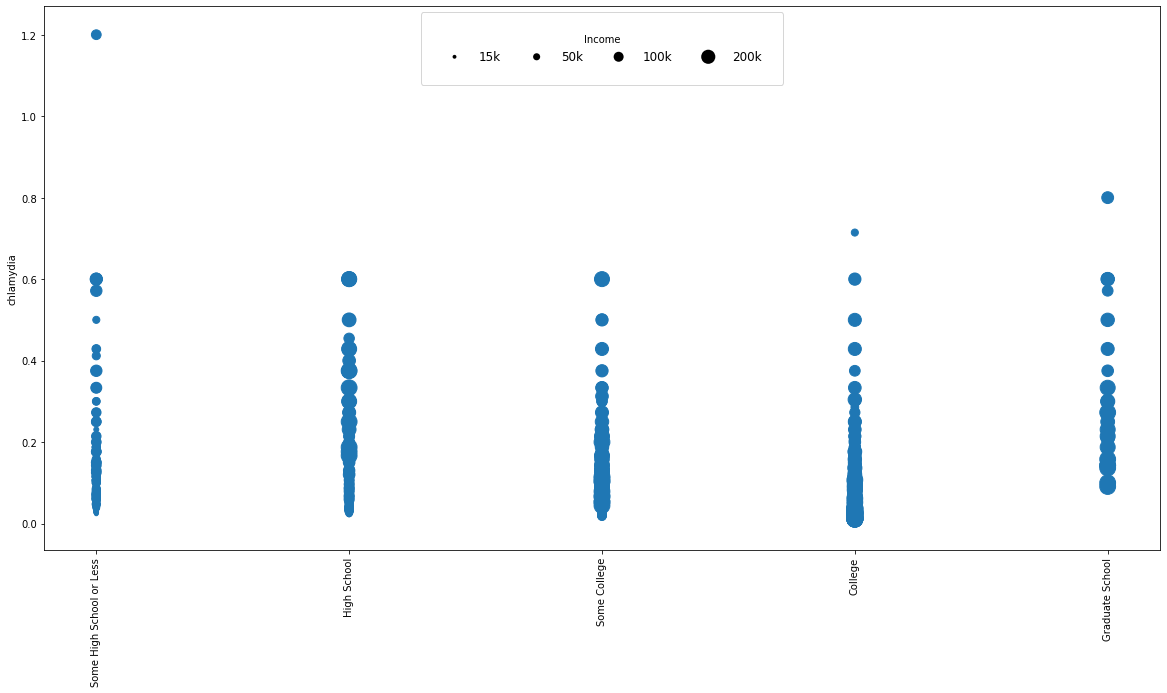

<Figure size 432x288 with 0 Axes>

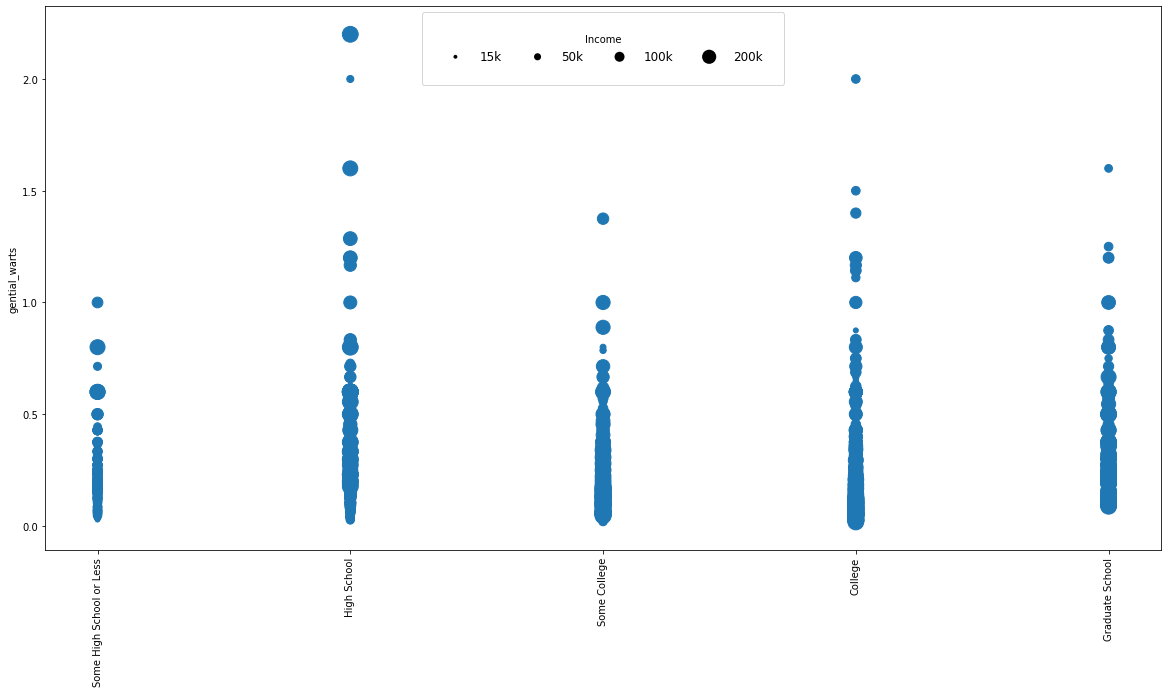

<Figure size 432x288 with 0 Axes>

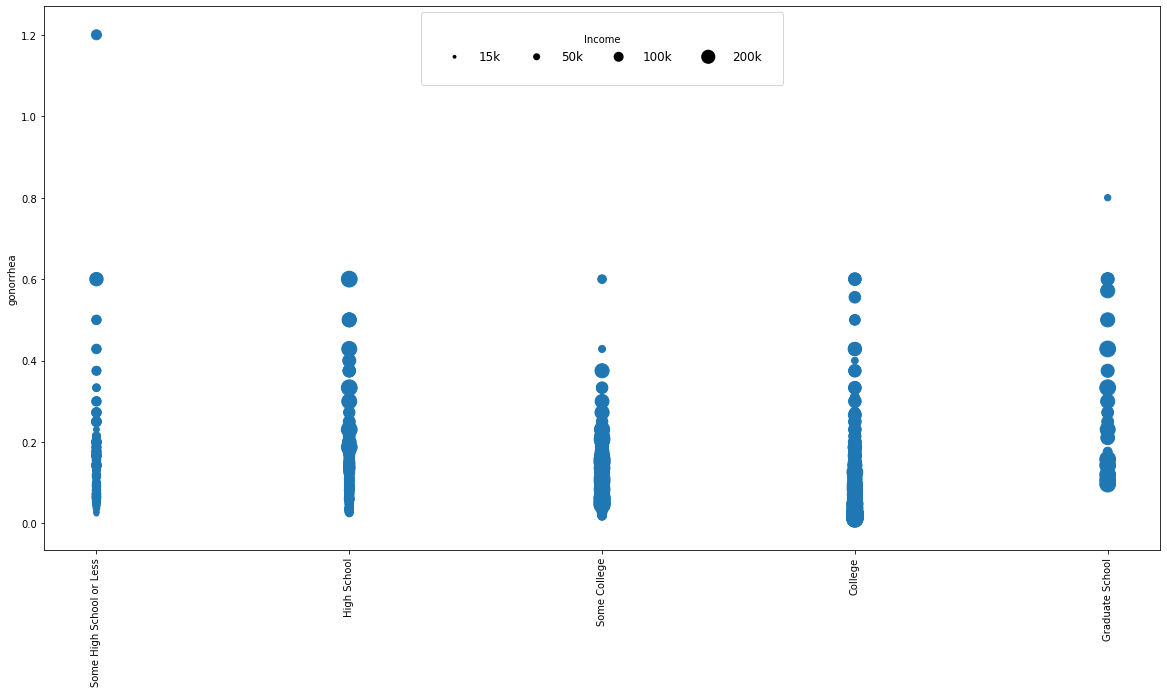

<Figure size 432x288 with 0 Axes>

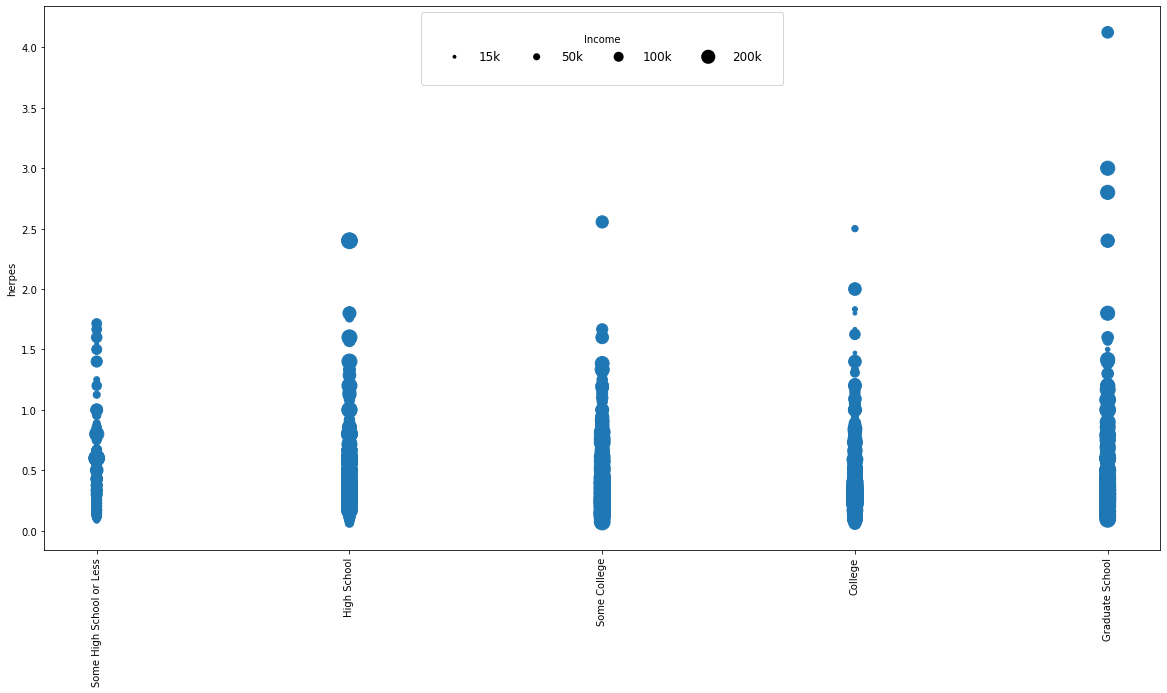

<Figure size 432x288 with 0 Axes>

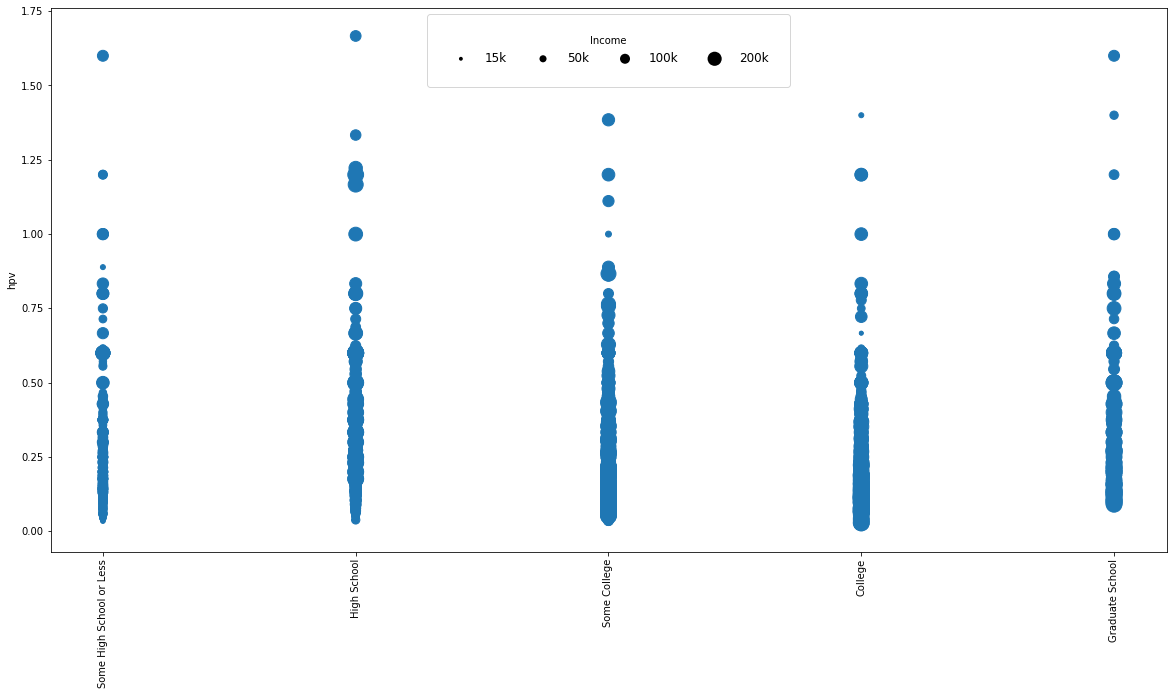

<Figure size 432x288 with 0 Axes>

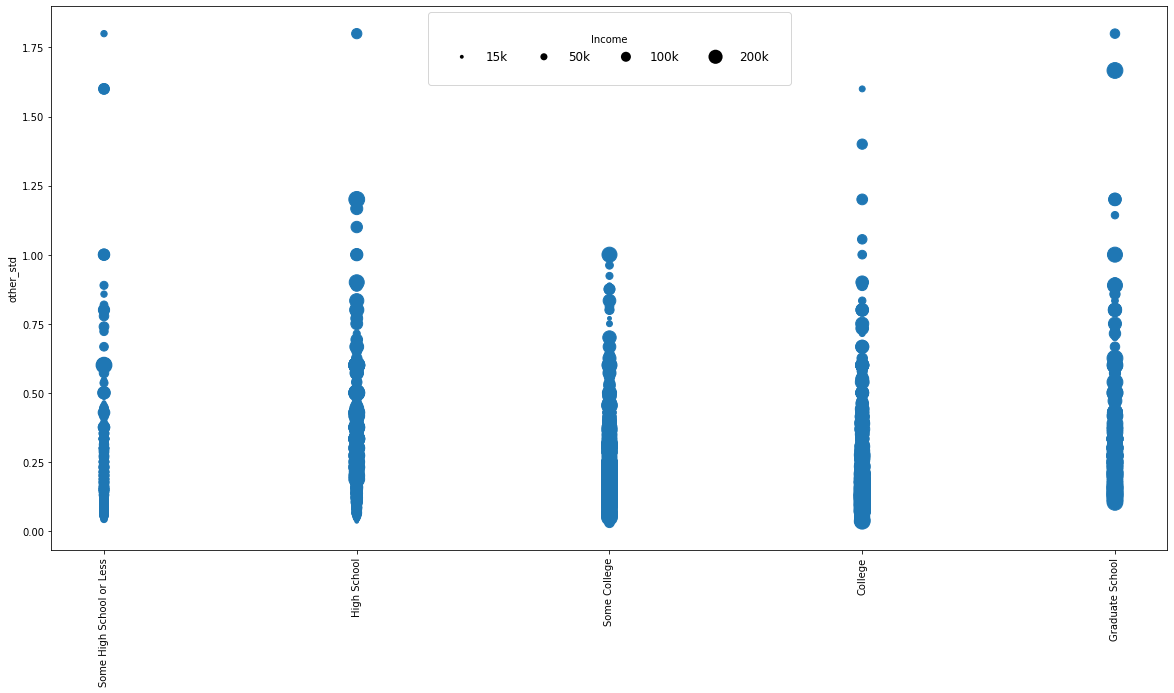

<Figure size 432x288 with 0 Axes>

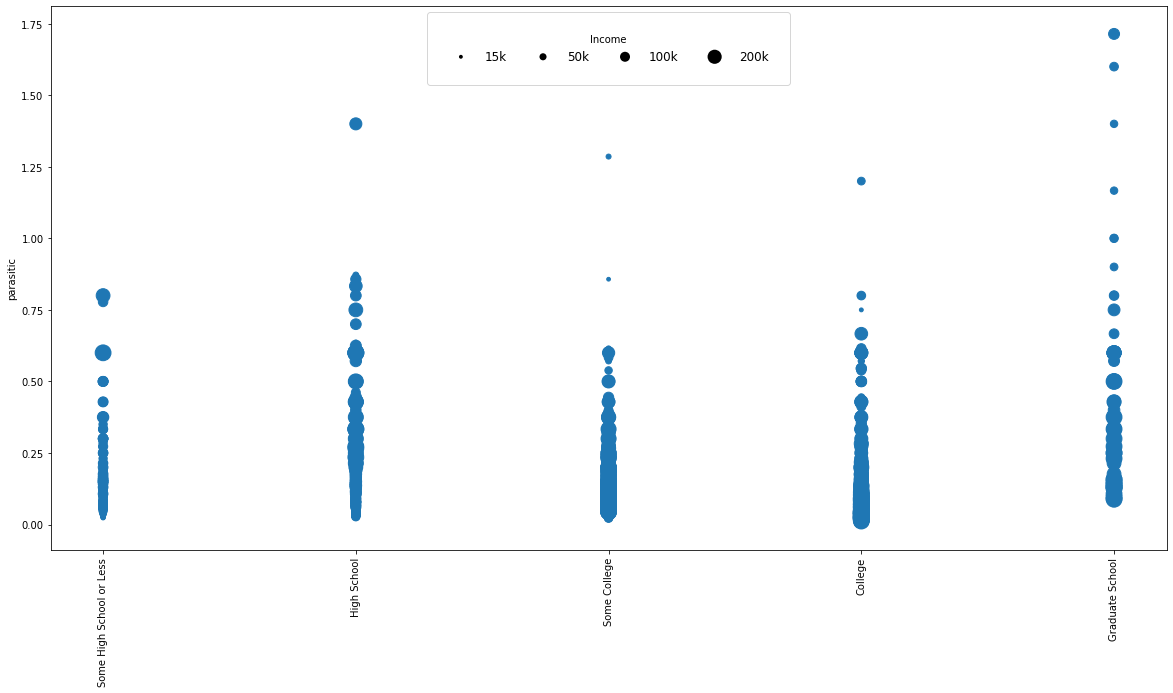

<Figure size 432x288 with 0 Axes>

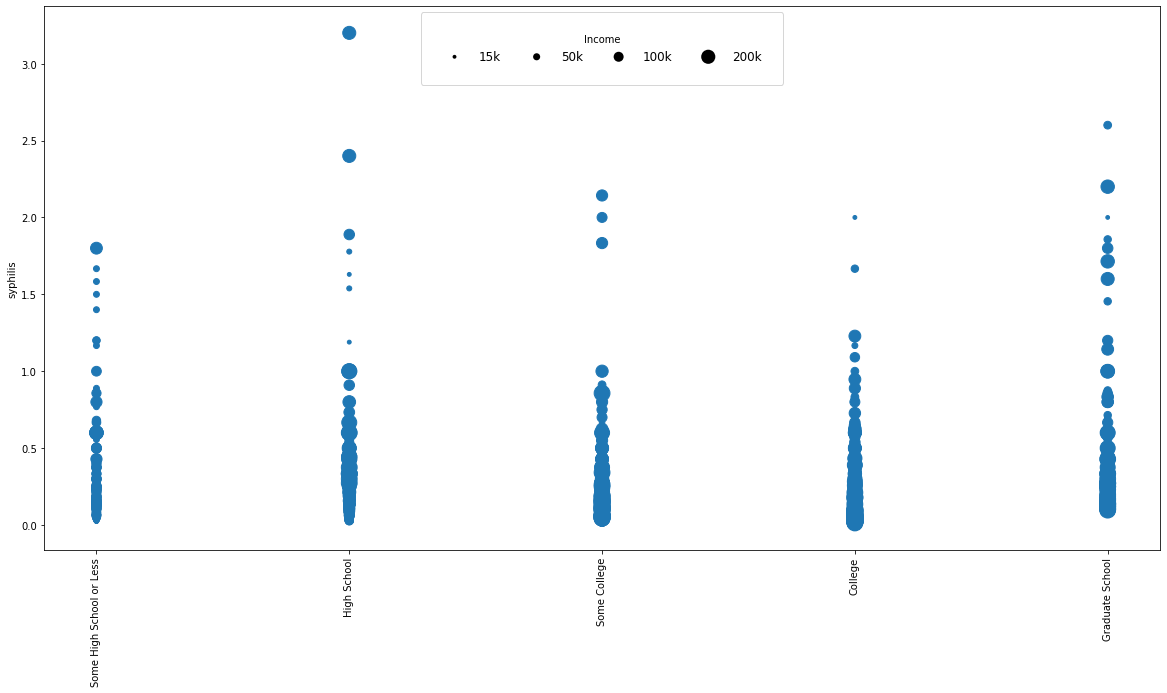

<Figure size 432x288 with 0 Axes>

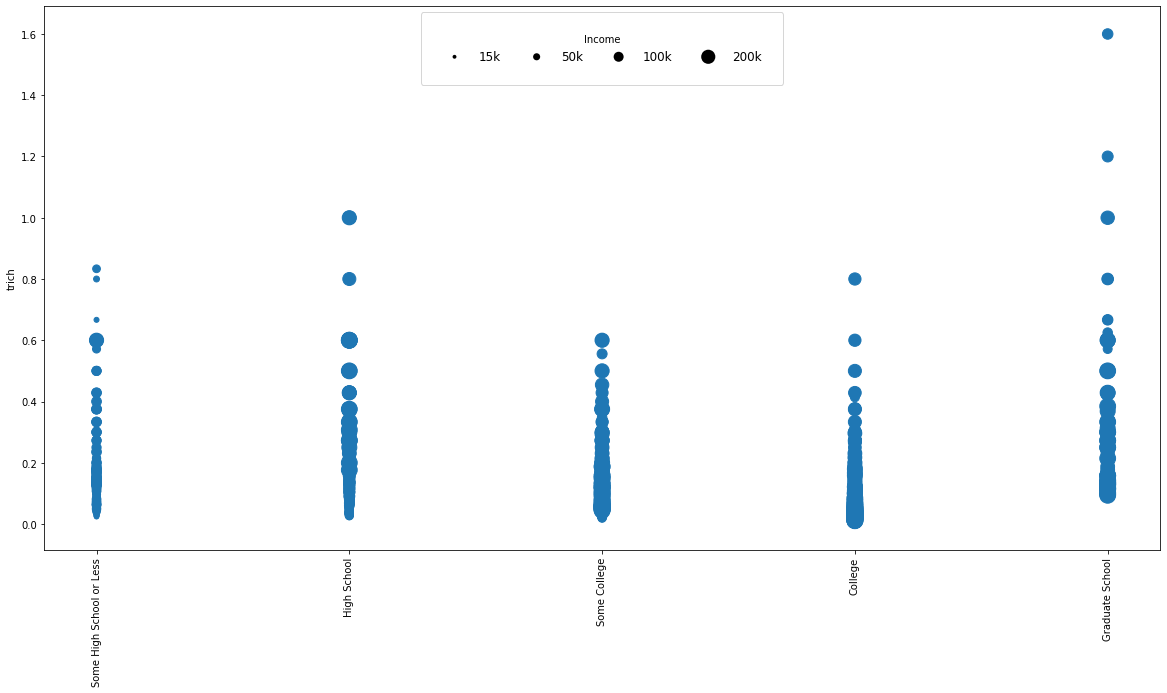

<Figure size 432x288 with 0 Axes>

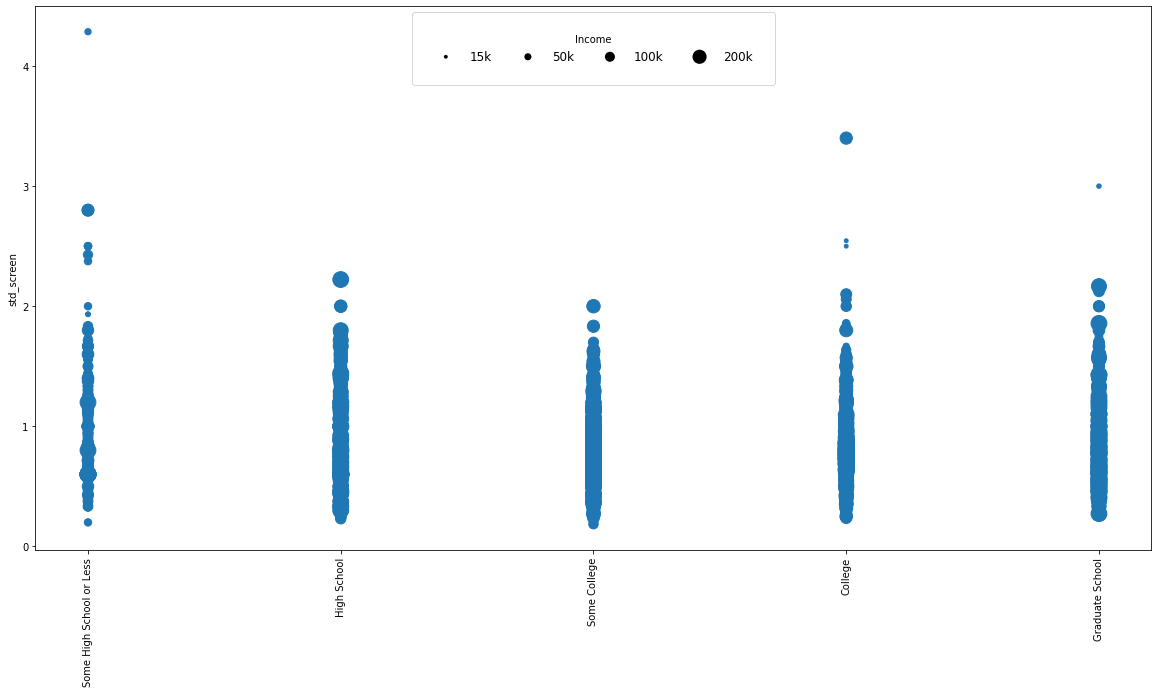

In [45]:
xaxis = 'education'
axislabels = ['Some High School or Less', 'High School', 'Some College', 'College', 'Graduate School']

for i in std_list:
    plt.figure()
    figure(figsize=(20, 10), facecolor='w')
    plt.scatter(dfCAold_educsort[xaxis], dfCAold_educsort[i], s=[i for i in incomenums])
    plt.xticks(rotation='vertical')
    plt.ylabel(i)
    plt.xticks([1,2,3,4,5], axislabels)
    #ax = dfCAold.set_index("education").loc[educorder]
    l1 = plt.scatter([],[], s=15, c = 'black', edgecolors='none')
    l2 = plt.scatter([],[], s=50, c = 'black', edgecolors='none')
    l3 = plt.scatter([],[], s=100, c = 'black', edgecolors='none')
    l4 = plt.scatter([],[], s=200, c = 'black', edgecolors='none')
    labels = ["15k", "50k", "100k", "200k"]
    leg = plt.legend([l1, l2, l3, l4], labels, ncol=4, frameon=True, fontsize=12,
                     handlelength=2, loc = 9, borderpad = 1.8,
                     handletextpad=1, title='Income', scatterpoints = 1)
    filename = 'Figures/' + i + '_scatter_' + xaxis + '.pdf'
    plt.savefig(filename, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

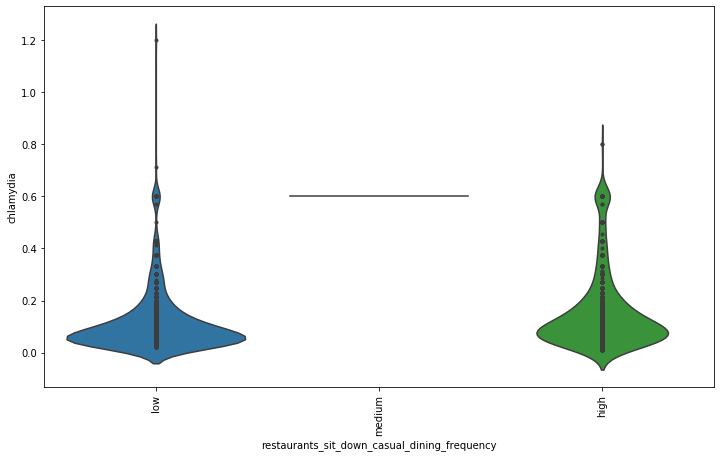

<Figure size 432x288 with 0 Axes>

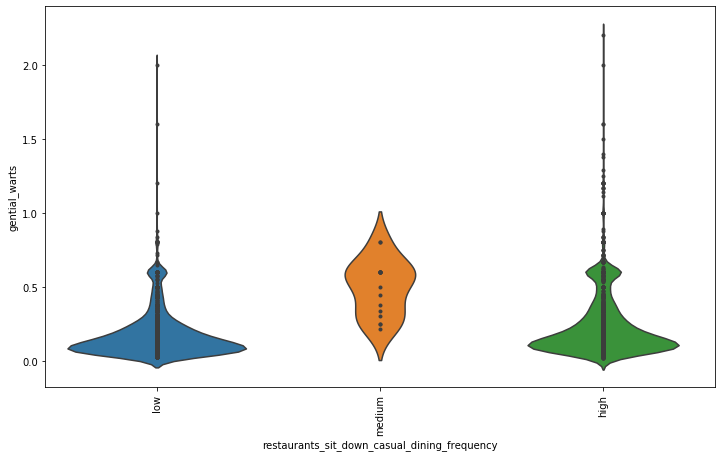

<Figure size 432x288 with 0 Axes>

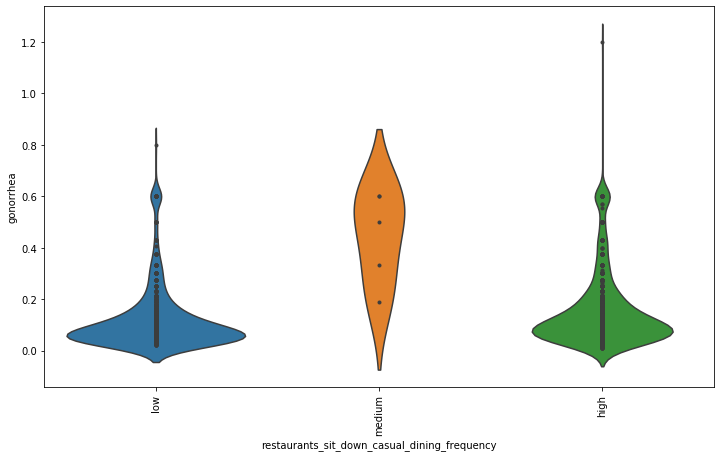

<Figure size 432x288 with 0 Axes>

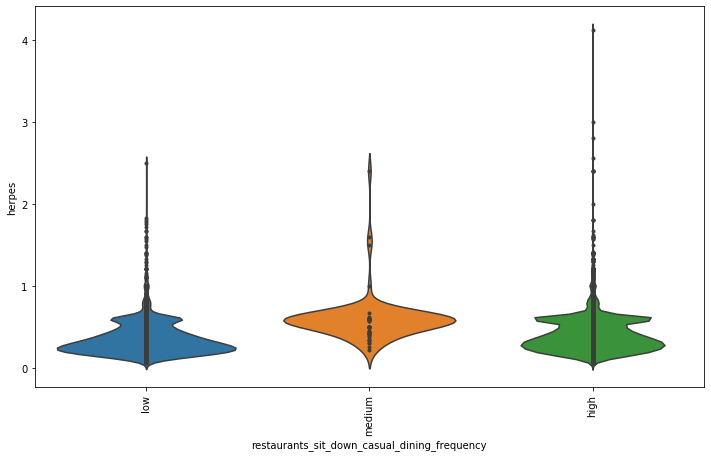

<Figure size 432x288 with 0 Axes>

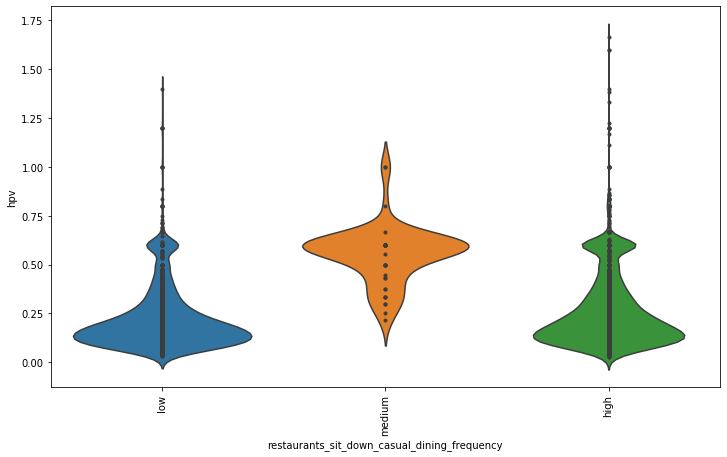

<Figure size 432x288 with 0 Axes>

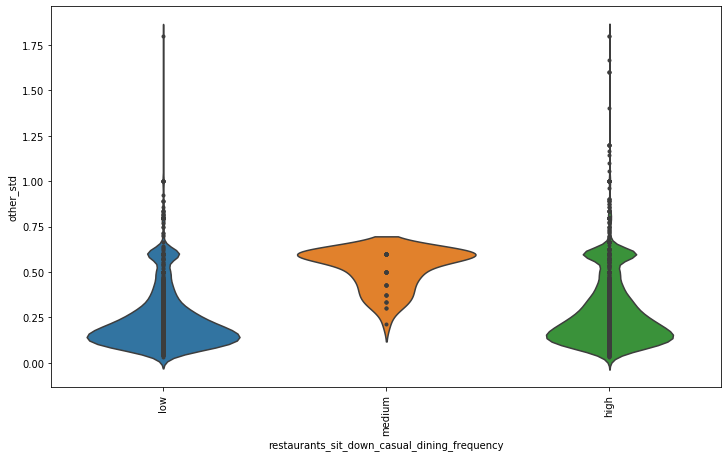

<Figure size 432x288 with 0 Axes>

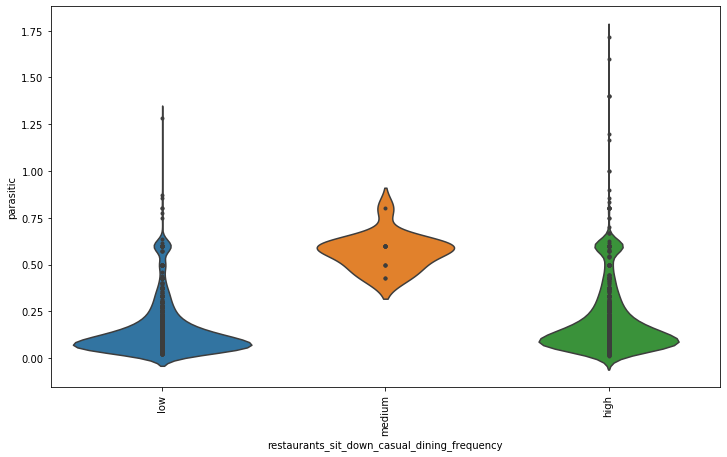

<Figure size 432x288 with 0 Axes>

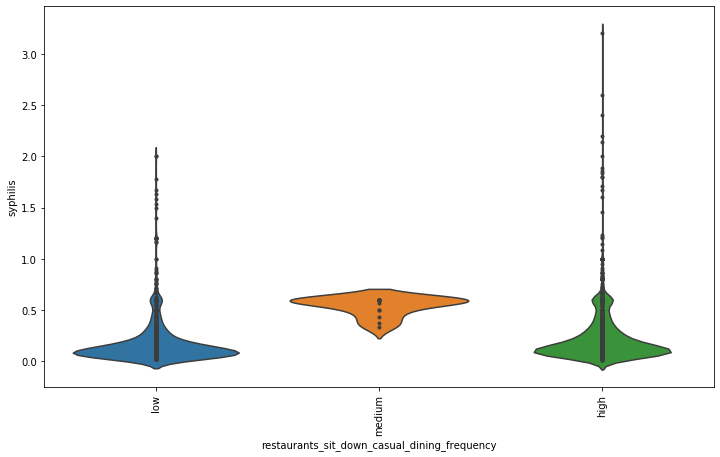

<Figure size 432x288 with 0 Axes>

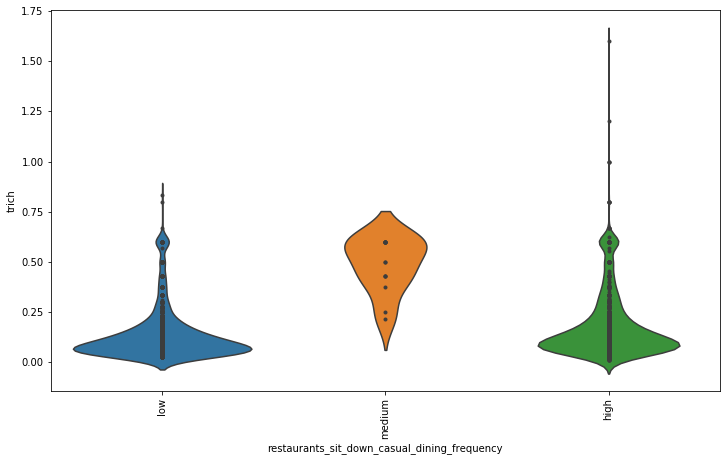

<Figure size 432x288 with 0 Axes>

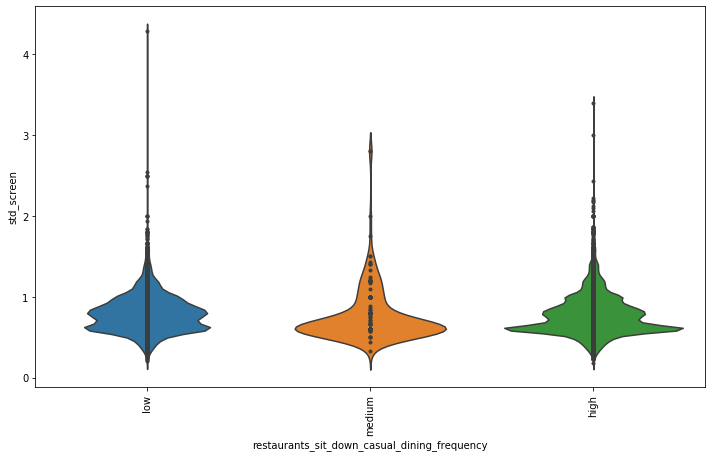

In [46]:
xaxis = 'restaurants_sit_down_casual_dining_frequency'
std_list=['chlamydia','gential_warts','gonorrhea','herpes','hpv',
          'other_std','parasitic','syphilis','trich','std_screen']
for i in std_list:
    plt.figure()
    figure(figsize=(12, 7), facecolor='w')
    sns.violinplot(dfCAold_educsort[xaxis], dfCAold_educsort[i], inner = "point", )
    plt.xticks(rotation='vertical')

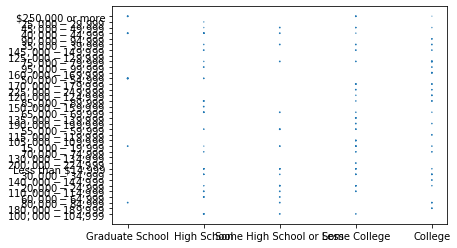

In [37]:
df_75f = df.loc[df['age'] == '75+ years old']
df_75f = df_75f.loc[df['gender'] == 'Female']
df_75fny = df_75f.loc[df['state'] == 'New York']
x = df_75fny['education']
y = df_75fny['income']
z = df_75fny['chlamydia']
plt.scatter(x,y,s=z)

While the above plot is hard to read, we can see that the data points in this group are fairly well distributed across income brackets and level of education. 

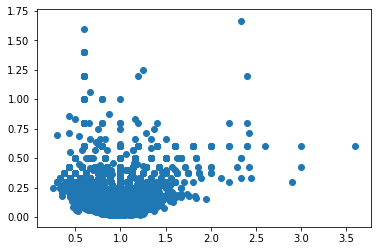

In [47]:
df_2534f = df.loc[df['age'] == '25-34 years old']
df_2534f = df_2534f.loc[df['gender'] == 'Female']
x = df_1824f['std_screen']
y = df_1824f['chlamydia']
#z = df_1824f['syphilis']
plt.scatter(x,y)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text xticklabel objects>)

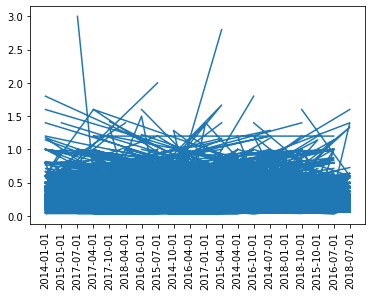

In [48]:
df_1824fnew = df_1824f.copy(deep = True)
pd.to_datetime(df_1824fnew['date'])
df_1824fnew[['date','hpv']].head(n=20)
plt.plot(df_1824fnew['date'], df_1824fnew['hpv'])
plt.xticks(rotation='vertical')
#df_1824fnew.replace({'date': r'^ba.$'}, {'A': 'new'}, regex=True)

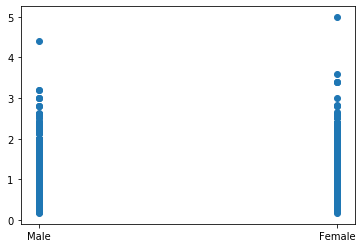

In [49]:
dfLA = df.loc[df['state'] == 'Louisiana']
plt.scatter(dfLA['gender'], dfLA['std_screen'])

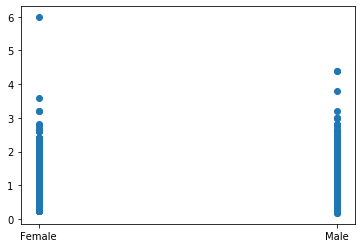

In [50]:
dfTX = df.loc[df['state'] == 'Texas']
plt.scatter(dfTX['gender'], dfTX['std_screen'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]), <a list of 36 Text xticklabel objects>)

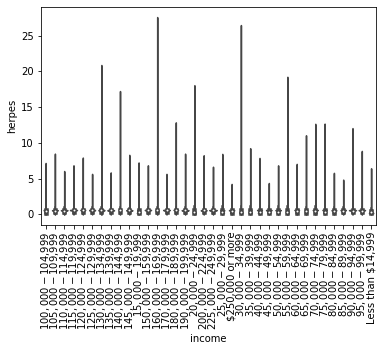

In [51]:
dfFL = df.loc[df['state'] == 'Florida']
dfFL = df.sort_values(by=['income'], ascending=True)
sns.violinplot(dfFL['income'], dfFL['herpes'])
plt.xticks(rotation='vertical')

In [52]:
dfTX = df.loc[df['state'] == 'Texas']

In [53]:
search = []
for values in dfTX['income']:
    items = re.findall(r'\$(\w+)\,', values)
    search.append(int(items[0]))
dfTX['incomenum'] = search # create new column with values in search
#dfTX.sort_values(by='incomenum')
#dfTX[['age','income','incomenum']]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [54]:
dfTXsort = dfTX.sort_values(by='incomenum', ascending = True)
dfTXsort[['age','income','incomenum']]

,age,income,incomenum
453363,25-34 years old,"Less than $14,999",14
1215314,75+ years old,"Less than $14,999",14
1215313,75+ years old,"Less than $14,999",14
1215312,75+ years old,"Less than $14,999",14
1215311,75+ years old,"Less than $14,999",14
...,...,...,...
789478,25-34 years old,"$250,000 or more",250
789479,25-34 years old,"$250,000 or more",250
789480,25-34 years old,"$250,000 or more",250
1097974,18-24 years old,"$250,000 or more",250


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]), <a list of 36 Text xticklabel objects>)

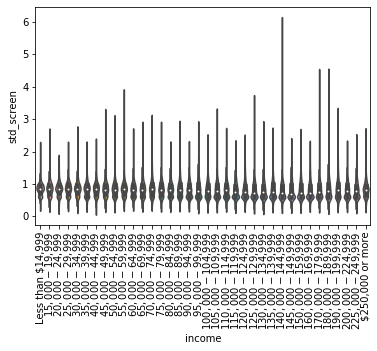

In [55]:
sns.violinplot(dfTXsort['income'], dfTXsort['std_screen'])
plt.xticks(rotation='vertical')